<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features.

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classification problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

%matplotlib inline

In [2]:
# Load file
df = pd.read_csv('/Users/stephanienduaguba/Documents/DATA/breast-cancer-wisconsin-data.csv')

In [3]:
# First 5 rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 2. EDA

- Explore dataset. Clean data (if required)
- Find features to predict class

In [5]:
# Check null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Explore the target variable
# Check unique categories
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
# Check percentage of value counts
df['diagnosis'].value_counts()/len(df) * 100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

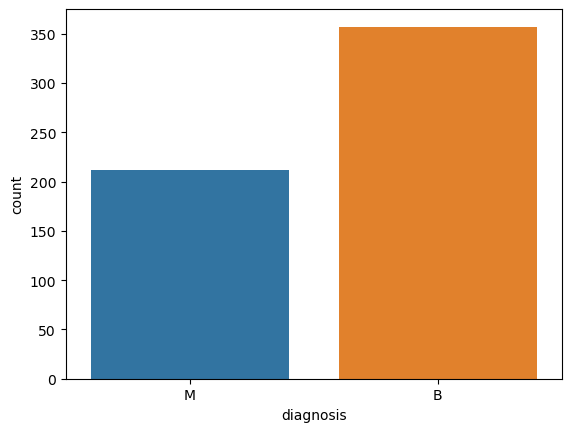

In [8]:
# Countplot of target variable
sns.countplot(data=df, x='diagnosis');

In [9]:
# Convert target variable to binary format
# Define the mapping
mapping = {'M': 1, 'B': 0}

# Apply the mapping to create a new binary column
df['target'] = df['diagnosis'].map(mapping)

# Display the resulting DataFrame
df[['id', 'diagnosis', 'target']].tail(10)

,id,diagnosis,target
559,925291,B,0
560,925292,B,0
561,925311,B,0
562,925622,M,1
563,926125,M,1
564,926424,M,1
565,926682,M,1
566,926954,M,1
567,927241,M,1
568,92751,B,0


In [10]:
# Column headers
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32', 'target'],
      dtype='object')

In [11]:
# Drop unneccessary columns - id, diagnosis, Unnamed:32
drop_columns = ['id', 'diagnosis', 'Unnamed: 32']
df.drop(columns=drop_columns, inplace=True)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [12]:
# Correlation with target variable
target_correlation = df.corr()['target'].sort_values(ascending=True)
target_correlation

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

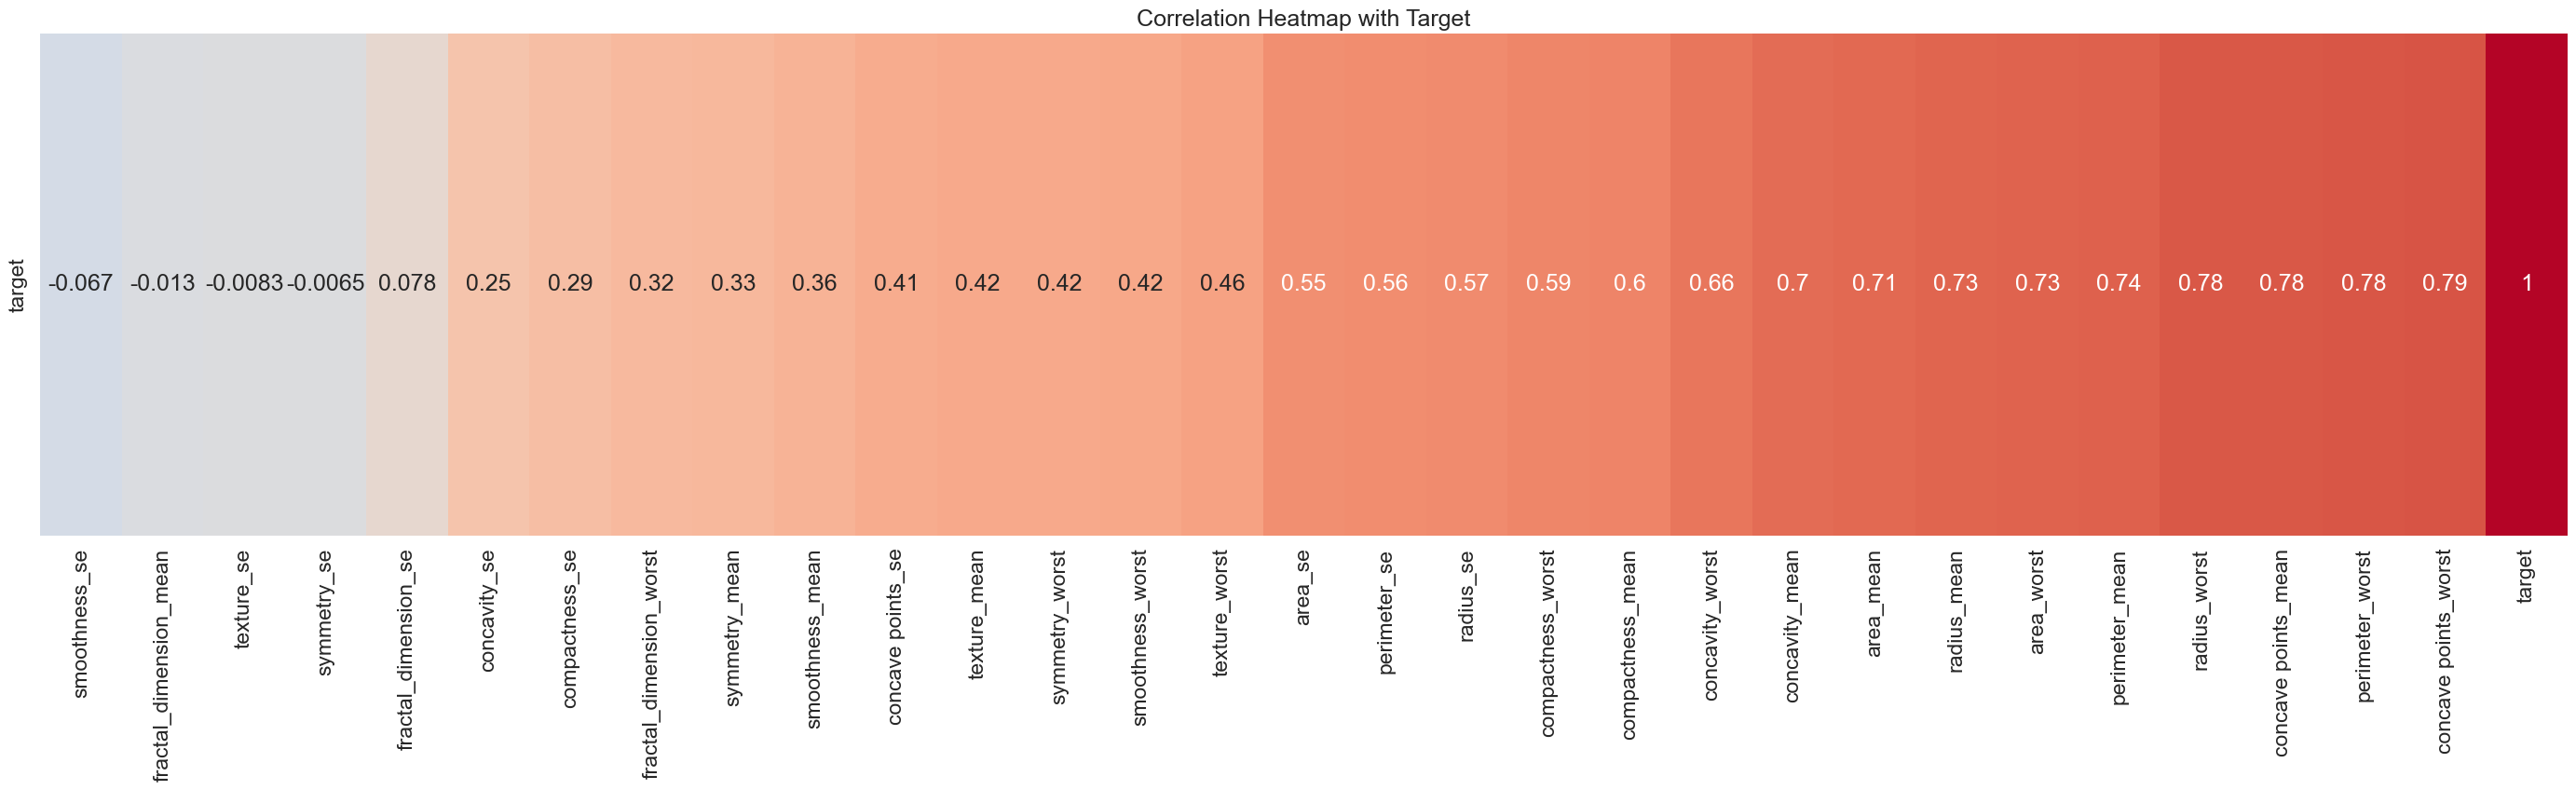

In [13]:
# Correlation matrix heatmap
sns.set(font_scale=1.5)
plt.figure(figsize=(35, 7))
sns.heatmap(target_correlation.to_frame().T, annot=True, cmap='coolwarm', cbar=False, center=0)
plt.title('Correlation Heatmap with Target')
plt.show()

Out of the 30 features, 26 show a positive correlation with the target variable, indicating that an increase in these features corresponds to a higher likelihood of malignant breast cancer. Conversely, only four features display a negative correlation with the target variable.

In [14]:
# Describe features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [15]:
# Column headers
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')

In [16]:
# Standardize or normalize feature variables
s_sc = StandardScaler()
col_to_scale = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
               'smoothness_mean', 'compactness_mean', 'concavity_mean',
               'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
               'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
               'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
               'fractal_dimension_se', 'radius_worst', 'texture_worst',
               'perimeter_worst', 'area_worst', 'smoothness_worst',
               'compactness_worst', 'concavity_worst', 'concave points_worst',
               'symmetry_worst', 'fractal_dimension_worst']
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])

In [17]:
# Confirm standardization or normalization has been applied
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,-1.373633e-16,1.000880,-2.029648,-0.689385,-0.215082,0.469393,3.971288
texture_mean,569.0,6.868164e-17,1.000880,-2.229249,-0.725963,-0.104636,0.584176,4.651889
perimeter_mean,569.0,-1.248757e-16,1.000880,-1.984504,-0.691956,-0.235980,0.499677,3.976130
area_mean,569.0,-2.185325e-16,1.000880,-1.454443,-0.667195,-0.295187,0.363507,5.250529
smoothness_mean,569.0,-8.366672e-16,1.000880,-3.112085,-0.710963,-0.034891,0.636199,4.770911
compactness_mean,569.0,1.873136e-16,1.000880,-1.610136,-0.747086,-0.221940,0.493857,4.568425
concavity_mean,569.0,4.995028e-17,1.000880,-1.114873,-0.743748,-0.342240,0.526062,4.243589
concave points_mean,569.0,-4.995028e-17,1.000880,-1.261820,-0.737944,-0.397721,0.646935,3.927930
symmetry_mean,569.0,1.748260e-16,1.000880,-2.744117,-0.703240,-0.071627,0.530779,4.484751
fractal_dimension_mean,569.0,4.745277e-16,1.000880,-1.819865,-0.722639,-0.178279,0.470983,4.910919


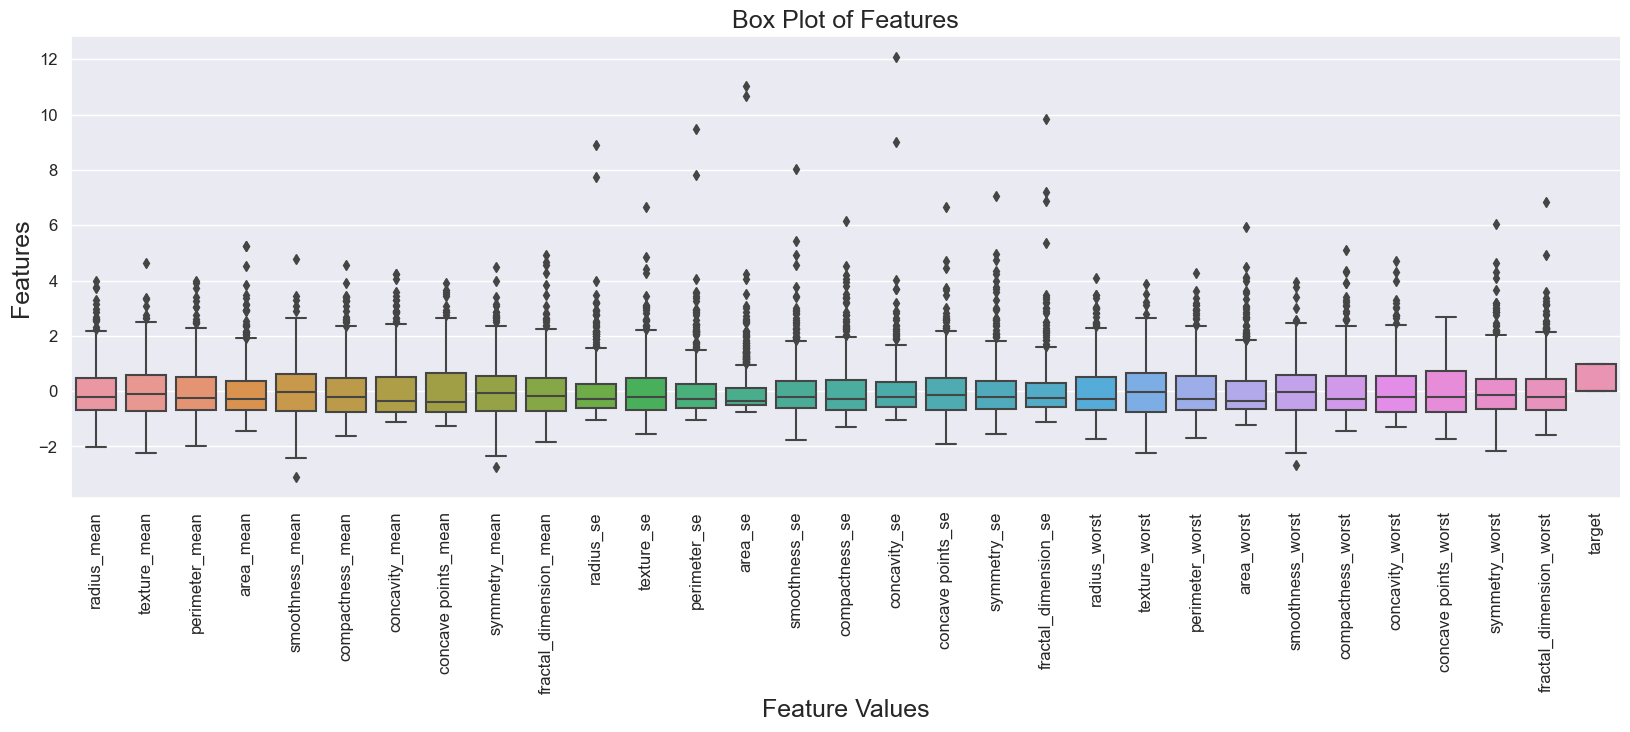

In [18]:
# Boxplot of features
plt.figure(figsize=(20,6))
sns.boxplot(data=df, orient='v')
plt.xlabel('Feature Values', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title('Box Plot of Features')

plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [19]:
# Define target and predictor variables
X = df.drop('target', axis=1) # Note: axis=1 tells pandas to drop a column not a row
y = df['target']

In [20]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Apply LogisticRegression model
logreg = LogisticRegression(solver='liblinear')

# Train the model 
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [22]:
# Evaluate the model on training data
train_pred = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Evaluate the model on testing data
test_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Print accuracy scores
print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9736842105263158


In [23]:
# Confusion matrix
confusion = confusion_matrix(y_test, test_pred)
print(confusion)

[[70  1]
 [ 2 41]]


In [24]:
# Classification report
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [25]:
# Apply Support Vector Machine model
svc = svm.SVC(probability=True)

# Train the model
svc.fit(X_train, y_train)

SVC(probability=True)

In [26]:
# Evaluate the model on training data
train_pred = svc.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Evaluate the model on testing data
test_pred = svc.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Print accuracy scores
print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9736842105263158


In [27]:
# Confusion matrix
confusion = confusion_matrix(y_test, test_pred)
print(confusion)

[[70  1]
 [ 2 41]]


In [28]:
# Classification report
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [29]:
# Apply the Naive Bayes model
naive_bayes = GaussianNB() # Using GaussianNB given our dataset has continuous data

# Train the model
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [30]:
# Evaluate the model on training data
train_pred = naive_bayes.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

#Evaluate the model on testing data
test_pred = naive_bayes.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Print accuracy scores
print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.9362637362637363
Testing Accuracy: 0.9649122807017544


In [31]:
# Confusion matrix
confusion = confusion_matrix(y_test, test_pred)
print(confusion)

[[70  1]
 [ 3 40]]


In [32]:
# Classification report
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression

Find out how these parameters effect model. Find out the best estimator, score.

In [33]:
# Set up dictionary with the LR parameter to test
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

In [34]:
# Create a GridSearchCV instance
lr_gs = GridSearchCV(logreg, lr_params, scoring='accuracy', cv=5)

# Fit the GridSearch to the training data
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [35]:
# Get the best hyperparameters
best_params_lr = lr_gs.best_params_
best_params_lr

{'C': 1, 'penalty': 'l1'}

In [36]:
# Get the best model
best_model = lr_gs.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [37]:
# Set up dictionary with the SVC parameter to test
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [38]:
# Create a GridSearchCV instance
svc_gs = GridSearchCV(svc, svc_params, scoring='accuracy', cv=5)

# Fit the GridSearch to the training data
svc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [39]:
# Get the best hyperparameters
best_params_svc = svc_gs.best_params_
best_params_svc

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [40]:
# Get the best model
best_model = svc_gs.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9824561403508771

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

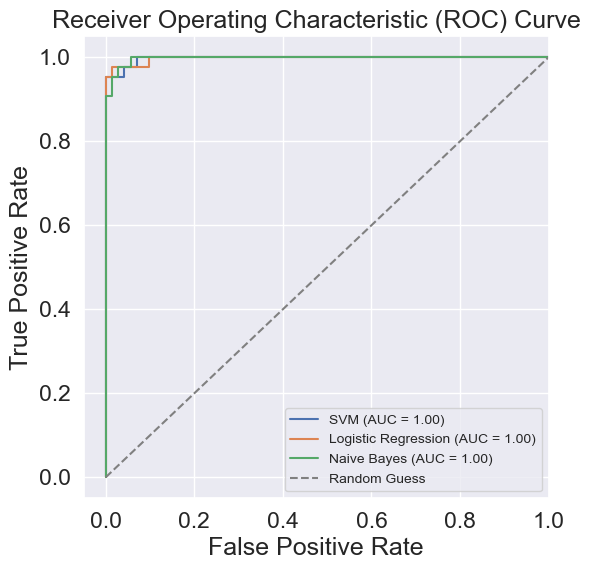

In [41]:
# Create and train the models
models = [
    ('SVM', svm.SVC(probability=True)),
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB())
]

plt.figure(figsize=(6, 6))

for model_name, model in models:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for each model
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right", fontsize=10)

# Show the ROC curve plot
plt.show()

### 7. [BONUS] Learning Curve

A learning curve compares the validation and training performance of an estimator for varying amounts of training data. If both the validation and training score converge to a value that is too low, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

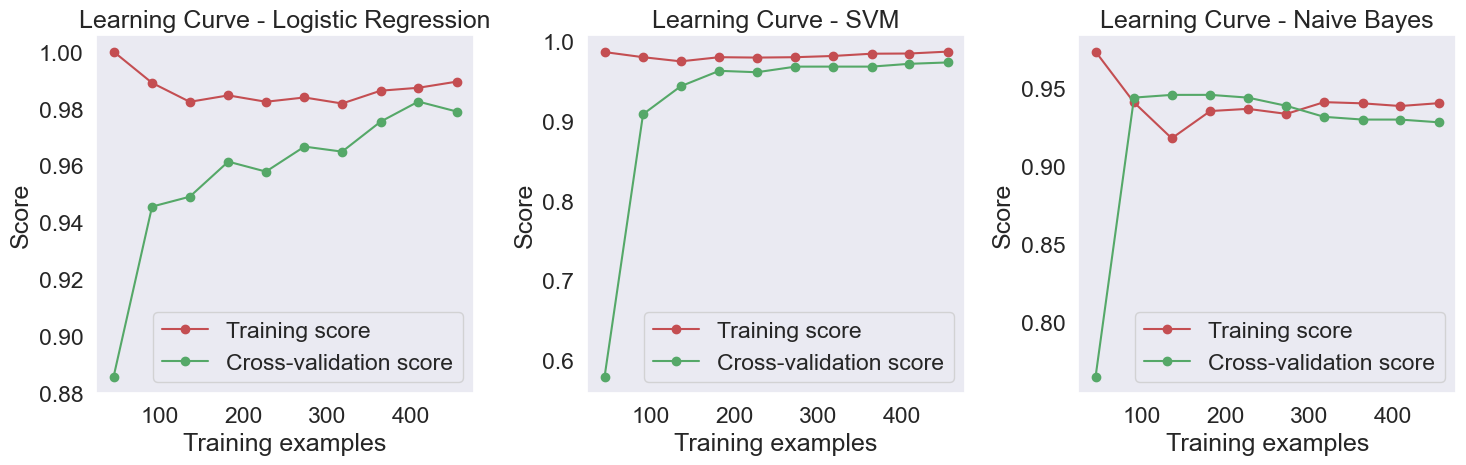

In [42]:
# List of models and their names
models = [logreg, svc, naive_bayes]
model_names = ["Logistic Regression", "SVM", "Naive Bayes"]

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, model in enumerate(models):
    # Create a learning curve for each model
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    
    # Calculate the mean scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    #Plot the learning curve on the respective subplot
    axes[i].set_title(f"Learning Curve - {model_names[i]}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("Score")
    axes[i].grid()
    axes[i].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[i].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[i].legend(loc="best")
    
plt.tight_layout()
plt.show()

Interpreting the learning curve:

Underfitting: If both the training and cross-validation scores are low and relatively close to each other, it indicates that the model is too simple or hasn't learned the underlying patterns in the data. Collecting more data might not help significantly. To improve the model, you might need to increase its complexity.

Overfitting: If there's a substantial gap between the training and cross-validation scores, it suggests that the model is overfitting the training data. In this case, providing more training examples might help reduce the gap and improve generalization.

Balanced Model: A well-fitted model will have both the training and cross-validation curves close to each other with high scores. This indicates that the model is learning effectively from the data and generalizing well.

Saturation Point: You might notice that the curves start to stabilize as the number of training examples increases. This saturation point indicates that collecting more data is unlikely to significantly improve the model's performance.

In summary, learning curves are essential for diagnosing issues like underfitting and overfitting. They help you decide whether to collect more data, adjust the model's complexity, or fine-tune hyperparameters.

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



